In [ ]:
# other classes
# cartoon like images

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
     ])

batch_size = 200

trainset = torchvision.datasets.SVHN(root='../data/SVHN', split="train",
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

Using downloaded and verified file: ../data/SVHN\train_32x32.mat


In [23]:
# save 100 out of distribution data
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
training_data = torch.Tensor().to(device)
training_labels = torch.Tensor().to(device)
for data, target in trainloader:
    training_data = torch.cat((training_data, data), 0)
    training_labels = torch.cat((training_labels, target), 0)
    break

In [24]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
OOD_path = os.path.join(content_path, "OOD")
if not os.path.exists(OOD_path):
    os.mkdir(OOD_path)
SVHN_path = os.path.join(OOD_path, "SVHN")
if not os.path.exists(SVHN_path):
    os.mkdir(SVHN_path)
training_data_path = os.path.join(SVHN_path, "data.pth")
training_labels_path = os.path.join(SVHN_path, "label.pth")
torch.save(training_data, training_data_path)
torch.save(training_labels, training_labels_path)

100%|██████████| 1/1 [00:00<00:00, 30.38it/s]

Finish loading content!


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B539E8160>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B1F81A898>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B1FC98EB8>


100%|██████████| 50/50 [00:00<00:00, 5553.16it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B21135358>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B4D740B70>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B55C40CC0>


100%|██████████| 50/50 [00:00<00:00, 5570.12it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B59744550>


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021B55C40358>


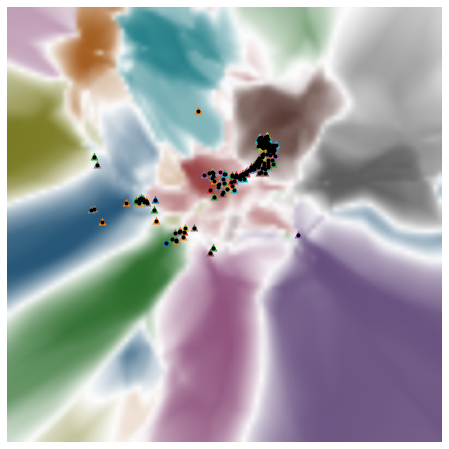

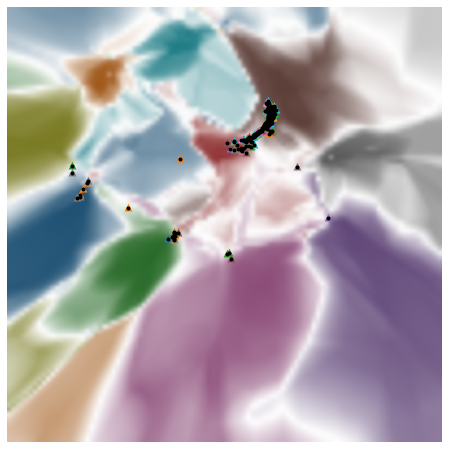

In [27]:
from deepvisualinsight.MMS import MMS
from deepvisualinsight import utils
import sys
import numpy as np

content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 10, 200, 10, 512, 10, classes, cmap="tab10", resolution=100, neurons=256, verbose=1, temporal=False, split=-1, advance_border_gen=True, alpha=0.8, attack_device="cuda:0")

repr = mms.get_representation_data(180, training_data)

img_save_location = os.path.join(mms.content_path, "img")

for i in range(160, 200, 20):
    test_data = mms.get_epoch_test_repr_data(i)
    test_labels = mms.get_epoch_test_labels()
    mms.customize_visualize(i, repr, training_labels.cpu().numpy(), test_data, test_labels.cpu().numpy(),
                            os.path.join(img_save_location, "alb_{:d}".format(i)), np.arange(-200, 0, 1))